In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Parameters
lamda = 0.8
n_x = 200
dx = 2 / n_x
dt = lamda * dx
n_t = round(0.3 / dt)

In [14]:
# Initialize matrix
M = np.zeros((n_t + 1, n_x + 1))

# Initial conditions
for i in range(1, n_x + 1):
    if np.abs(-1 + dx * (i - 1)) < (1/3):
        M[0, i] = 1
    else:
        M[0, i] = -1

In [15]:
# Apply Lax-Friedrichs method
for i in range(1, n_t + 1):
    for j in range(1, n_x):
        M[i, j] = 0.5 * (M[i-1, j+1] + M[i-1, j-1]) - lamda * 0.5 * (
            0.5 * M[i-1, j+1] * M[i-1, j+1] - 0.5 * M[i-1, j-1] * M[i-1, j-1]
        )
    M[i, 0] = 0.5 * (M[i-1, n_x] + M[i-1, 1]) - lamda * 0.5 * 0.5 * (
        M[i-1, 1] ** 2 - M[i-1, n_x] ** 2
    )
    M[i, n_x] = M[i, 0]

# Plotting
x_data_1 = np.linspace(-1, 1, n_x + 1)
y_data_1 = M[n_t, :]

# Parameters for higher resolution
n_x = 5000
dx = 2 / n_x
dt = lamda * dx
n_t = round(0.3 / dt)

# Initialize matrix
M = np.zeros((n_t + 1, n_x + 1))

# Initial conditions
for i in range(1, n_x + 1):
    if np.abs(-1 + dx * (i - 1)) < (1/3):
        M[0, i] = 1
    else:
        M[0, i] = -1

# Apply Lax-Friedrichs method
for i in range(1, n_t + 1):
    for j in range(1, n_x):
        M[i, j] = 0.5 * (M[i-1, j+1] + M[i-1, j-1]) - lamda * 0.5 * (
            0.5 * M[i-1, j+1] * M[i-1, j+1] - 0.5 * M[i-1, j-1] * M[i-1, j-1]
        )
    M[i, 0] = 0.5 * (M[i-1, n_x] + M[i-1, 1]) - lamda * 0.5 * 0.5 * (
        M[i-1, 1] ** 2 - M[i-1, n_x] ** 2
    )
    M[i, n_x] = M[i, 0]

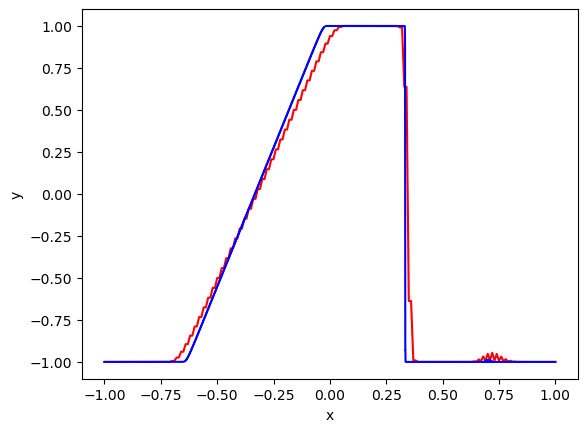

In [16]:
# Plotting
x_data_2 = np.linspace(-1, 1, n_x + 1)
y_data_2 = M[n_t, :]

plt.plot(x_data_1, y_data_1, 'r', x_data_2, y_data_2, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Animation
# plt.figure()
# for k in range(1, 101):
#     plt.plot(x_data_1, M[k*5, :], 'r')
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.pause(0.1)
# plt.show()